### Goal: Menampilkan jumlah customer yang berhenti langganan (Churn Rate)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data
#### Data berasal dari file dummy/fake data yang di generate menggunakan Python dengan Faker library

In [5]:
df = pd.read_csv('~/kode/python/mini_project/indosat_dashboard/data_pelanggan_indosat.csv')

### Tampilkan 5 baris data 

In [6]:
df.head()

,Nama,No_HP,Kota,Paket,Tgl_beli,Durasi_Bulan,Frekuensi_Topup,Kuota_Bulan_GB
0,"Balidin Dongoran, S.T.",85799239640,Surabaya,Freedom Combo,2024-10-08,9,5,16
1,Okto Jailani,81478074443,Jakarta,Freedom Combo,2025-03-15,4,1,7
2,R. Lantar Anggraini,81462526817,Medan,Freedom Combo,2024-07-22,12,2,20
3,Darimin Pradipta,81443713796,Semarang,Unlimited 2GB,2025-01-11,2,3,5
4,Kanda Napitupulu,85669303428,Surabaya,Yellow,2025-03-30,12,1,1


### Exploratory Data Analysis (EDA)

#### Menampilkan Kota dengan jumlah pelanggan terbanyak

In [23]:
pelanggan_per_kota = df['Kota'].value_counts()
print('Jumlah pelanggan per kota: ')
print(pelanggan_per_kota)

Jumlah pelanggan per kota: 
Kota
Yogyakarta    37
Bandung       33
Semarang      30
Makassar      30
Surabaya      28
Medan         21
Jakarta       21
Name: count, dtype: int64


### Tampilkan grafik kota dengan jumlah pelanggan

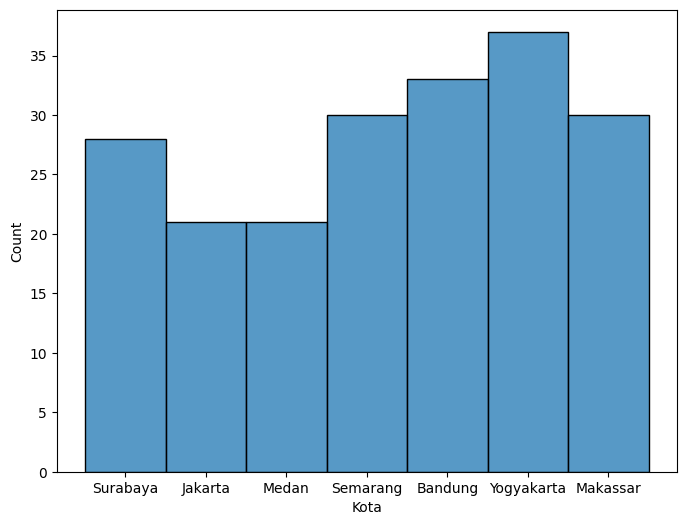

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x=df['Kota'])
plt.show()

### Menghitung Churn Rate Customer
 Perhitungan customer yang berhenti menggunakan produk ditetapkan dengan
 menghitung Frekuensi_Topup kurang dari atau sama dengan 1 dalam waktu Durasi_Bulan
 minimal 3 bulan atau lebih

In [27]:
# mengetahui churn rate
# Frekuensi_Topup ≤ 1 dalam 3+ bulan → dianggap churn

df['Churn'] = ((df['Frekuensi_Topup'] <= 1) & (df['Durasi_Bulan'] >= 3))

# hitung churn
churn_rate = df['Churn'].sum() / len(df) * 100
print(f'Hasil Persentase Churn Rate Customer: {churn_rate:.2f}%')

Hasil Persentase Churn Rate Customer: 22.50%


### Menampilkan Persentase churn rate dengan pie chart

/tmp/ipykernel_246776/2569498633.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sizes = [churn_counts[0], churn_counts[1]]


(np.float64(-1.0999999375173872),
 np.float64(1.099999910848056),
 np.float64(-1.0999996168667543),
 np.float64(1.099994043164426))

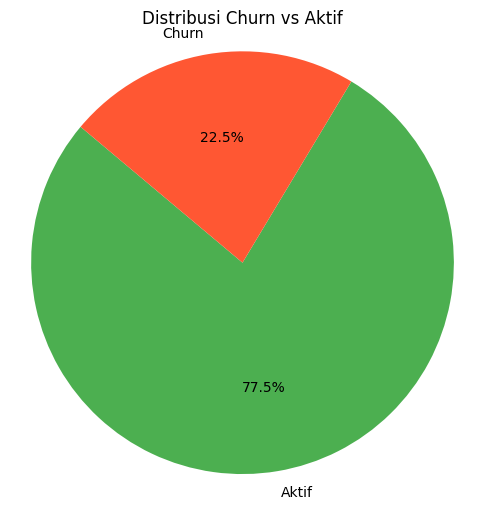

In [26]:
# Buat pie chart churn vs aktif
churn_counts = df['Churn'].value_counts()
labels = ['Aktif', 'Churn']
sizes = [churn_counts[0], churn_counts[1]]
colors = ['#4CAF50', '#FF5733']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribusi Churn vs Aktif')
plt.axis('equal')